In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [183]:
# loading dataset to a pandas dataframe
car_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\myenv\Supervised ML\Regression\Data\car_data\car data.csv')


In [184]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [185]:
# checking the is there is  null value
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [186]:
car_data.dropna()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [187]:
car_data.shape

(301, 9)

In [188]:
# getting some information about the dataset
car_data.info()
# object --> text data / categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [189]:
# checking the number of missing value 
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [190]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [191]:
# checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Selling_Price.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


  it select the columns which has data object datatype
 sel_cols = list(car_data.select_dtypes(include='object'))
 Just for understanding


In [192]:
# Encoding the categorical data "Fuel_Type" column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding the categorical data "Seller_Type" column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding the categorical data "Transmission" column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18584\943500812.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18584\943500812.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18584\943500812.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

In [193]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Spiliting the data into Training data and Test Data

In [194]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [195]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# Model Training

In [197]:
lin_reg_model = LinearRegression()

In [198]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [199]:
# predicting the data
training_data_prediction = lin_reg_model.predict(X_train)

In [200]:
# compare the value with original values
# original value is y_train and predicted value stored in the training_data_prediction
# R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8799451660493708


accuracy_score for classification problem 
R squared error for regression problem

# Visualize the actual prices and predicted prices

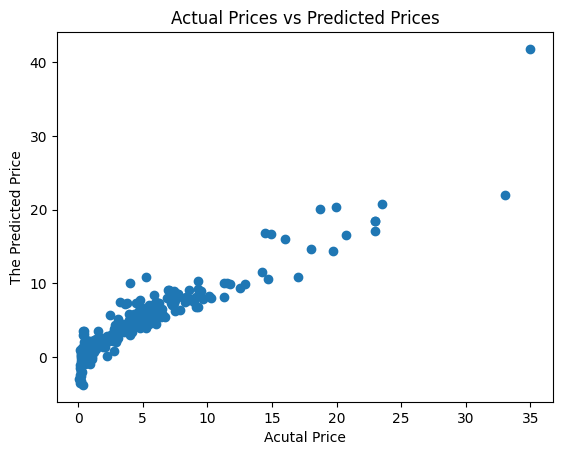

In [201]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Acutal Price")
plt.ylabel("The Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [202]:
# predicting the data on testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [203]:
# error checking on the testing data
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8365766715026374


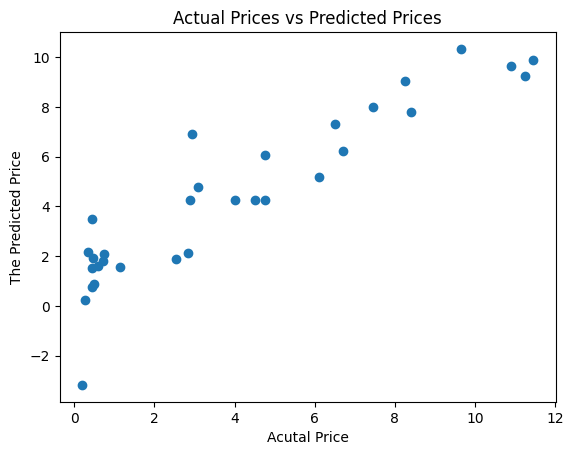

In [204]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Acutal Price")
plt.ylabel("The Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

If the data is directly proportional the linear regression is perform well but in the other cases 
Lasso regression perform well or Xgboost Regression

# Lasso Regression 

In [205]:
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train,y_train)

Lasso()

In [206]:
# model Evaluation
# predicting on the training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [207]:
# R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8427856123435794


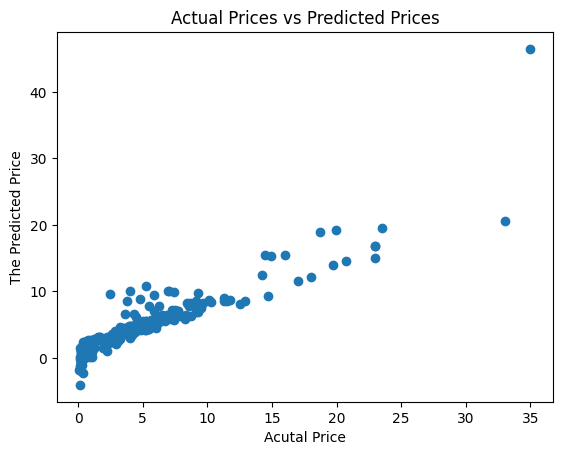

In [208]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Acutal Price")
plt.ylabel("The Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [209]:
# predicting the data on testing data
test_data_prediction = lasso_reg_model.predict(X_test)

In [210]:
# error checking on the testing data
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.8709167941173195


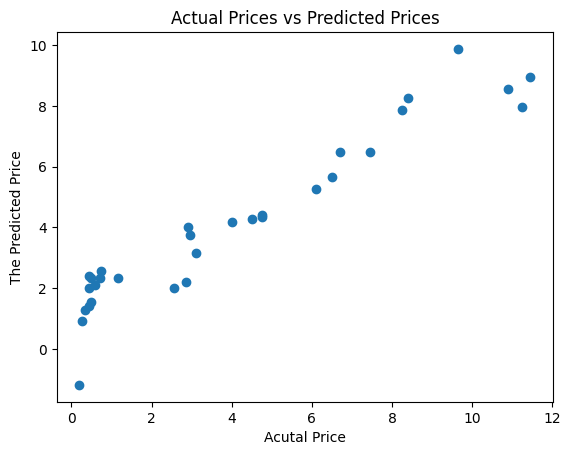

In [211]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Acutal Price")
plt.ylabel("The Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()